In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
gpt4 = pd.read_csv('gpt4_full_merged.csv')
gpt3 = pd.read_csv('/gpt3_full_merged.csv')
mistral = pd.read_csv('mistral_merged.csv')
llama = pd.read_csv('/llama/sample.csv')

# filter outliers based on IQR 
gpt3 = gpt3[(gpt3['gpt3_simple'].str.len() > 178) & (gpt3['gpt3_simple'].str.len() < 342)]
gpt4 = gpt4[(gpt4['gpt4_simple'].str.len() >246) & (gpt4['gpt4_simple'].str.len() < 322)]
llama = llama[(llama['llama_simple'].str.len() >33) & (llama['llama_simple'].str.len() < 535)]
llama = llama[llama['llama_simple'].notna()]

mistral = mistral[(mistral['mistral_simple'].str.len() > 136) & (mistral['mistral_simple'].str.len() < 532)]
mistral = mistral[mistral['mistral_simple'].notna()]

In [72]:
# llama without na - 9631  - 8061 after removing outliers and non relevant content 
len(llama)

8061

In [73]:
# mistral 192 nan # 9808 after filtering - 9431 after emoving outliers 
mistral = mistral[~mistral['mistral_simple'].isna()]
len(mistral)

9431

In [74]:
len(gpt4)

9337

In [75]:
len(gpt3)

9725

In [62]:
# Step 1: Calculate the lengths of the Mistral generated tweets
lengths_llama =llama['llama_simple'].str.len()

# Step 2: Calculate Q1 and Q3
Q1_llama = lengths_llama.quantile(0.25)
Q3_llama = lengths_llama.quantile(0.75)

# Step 3: Calculate IQR
IQR_llama = Q3_llama - Q1_llama

# Step 4: Calculate lower and upper bounds for outliers
lower_bound_llama = Q1_llama - 1.5 * IQR_llama
upper_bound_llama = Q3_llama + 1.5 * IQR_llama

# Print the calculated bounds
print(round(lower_bound_llama))
print(round(upper_bound_llama))

# Step 5: Find outliers and calculate the percentage of outliers
outliers_llama = lengths_llama[(lengths_llama < lower_bound_llama) | (lengths_llama > upper_bound_llama)]
percentage_outliers_llama = (len(outliers_llama) / len(lengths_llama)) * 100

# Print the percentage of outliers
print(round(percentage_outliers_llama, 2))

-145
535
2.41


In [23]:
# Step 1: Calculate the lengths of the Mistral generated tweets
lengths_mistral = mistral['mistral_simple'].str.len()

# Step 2: Calculate Q1 and Q3
Q1_mistral = lengths_mistral.quantile(0.25)
Q3_mistral = lengths_mistral.quantile(0.75)

# Step 3: Calculate IQR
IQR_mistral = Q3_mistral - Q1_mistral

# Step 4: Calculate lower and upper bounds for outliers
lower_bound_mistral = Q1_mistral - 1.5 * IQR_mistral
upper_bound_mistral = Q3_mistral + 1.5 * IQR_mistral

# Print the calculated bounds
print(round(lower_bound_mistral))
print(round(upper_bound_mistral))

# Step 5: Find outliers and calculate the percentage of outliers
outliers_mistral = lengths_mistral[(lengths_mistral < lower_bound_mistral) | (lengths_mistral > upper_bound_mistral)]
percentage_outliers_mistral = (len(outliers_mistral) / len(lengths_mistral)) * 100

# Print the percentage of outliers
print(round(percentage_outliers_mistral, 2))

136
532
3.03


In [20]:
# Step 1: Calculate the lengths of the GPT-4 generated tweets
lengths_gpt4 = gpt4['gpt4_simple'].str.len()

# Step 2: Calculate Q1 and Q3
Q1_gpt4 = lengths_gpt4.quantile(0.25)
Q3_gpt4 = lengths_gpt4.quantile(0.75)

# Step 3: Calculate IQR
IQR_gpt4 = Q3_gpt4 - Q1_gpt4

# Step 4: Calculate lower and upper bounds for outliers
lower_bound_gpt4 = Q1_gpt4 - 1.5 * IQR_gpt4
upper_bound_gpt4 = Q3_gpt4 + 1.5 * IQR_gpt4

# Print the calculated bounds
print(round(lower_bound_gpt4))
print(round(upper_bound_gpt4))

# Step 5: Find outliers and calculate the percentage of outliers
outliers_gpt4 = lengths_gpt4[(lengths_gpt4 < lower_bound_gpt4) | (lengths_gpt4 > upper_bound_gpt4)]
percentage_outliers_gpt4 = (len(outliers_gpt4) / len(lengths_gpt4)) * 100

# Print the percentage of outliers
print(round(percentage_outliers_gpt4, 2))

246
322
6.36


In [17]:
# Step 1: Calculate the lengths of the GPT-3 generated tweets
lengths_gpt3 = gpt3['gpt3_simple'].str.len()

# Step 2: Calculate Q1 and Q3
Q1_gpt3 = lengths_gpt3.quantile(0.25)
Q3_gpt3 = lengths_gpt3.quantile(0.75)

# Step 3: Calculate IQR
IQR_gpt3 = Q3_gpt3 - Q1_gpt3

# Step 4: Calculate lower and upper bounds for outliers
lower_bound_gpt3 = Q1_gpt3 - 1.5 * IQR_gpt3
upper_bound_gpt3 = Q3_gpt3 + 1.5 * IQR_gpt3

# Print the calculated bounds
print(round(lower_bound_gpt3))
print(round(upper_bound_gpt3))

# Step 5: Find outliers and calculate the percentage of outliers
outliers_gpt3 = lengths_gpt3[(lengths_gpt3 < lower_bound_gpt3) | (lengths_gpt3 > upper_bound_gpt3)]
percentage_outliers_gpt3 = (len(outliers_gpt3) / len(lengths_gpt3)) * 100

# Print the percentage of outliers
print(round(percentage_outliers_gpt3, 2))

178
342
0.5


In [8]:
print(gpt4['gpt4_simple'].str.len().mean())
print(gpt3['gpt3_simple'].str.len().mean())
print(mistral['mistral_simple'].str.len().mean())
print(llama['llama_simple'].str.len().mean())

284.1052800685445
260.6988174807198
336.33792810942634
239.0327502791217


In [10]:
print(gpt4['text'].str.len().median())
print(gpt4['gpt4_simple'].str.len().median())
print(gpt3['gpt3_simple'].str.len().median())
print(mistral['mistral_simple'].str.len().median())
print(llama['llama_simple'].str.len().median())

192.0
283.0
265.0
335.0
255.0


In [11]:
data = {
    'Original': gpt4['text'],
    'Llama': llama['llama_simple'],
    'Mistral': mistral['mistral_simple'],
    'GPT-3.5': gpt3['gpt3_simple'],
    'GPT-4': gpt4['gpt4_simple']
}

In [12]:
# Creating a DataFrame
df = pd.DataFrame(data)

# Ensure all values are strings
df = df.applymap(str)

# Calculating text lengths
df_lengths = df.applymap(len)

# Adding a column for the text length
df_lengths_melted = df_lengths.melt(var_name='model', value_name='length')

In [13]:
# Filter the DataFrame before grouping
df_filtered = df_lengths_melted[df_lengths_melted['length'] != 0]

# Group the filtered DataFrame by 'model'
#df_grouped = df_filtered.groupby('model')

# Aggregate the grouped data (example: sum or mean)
#df_aggregated = df_grouped.agg('mean')  # You can change 'mean' to another aggregation function like 'sum'

# Reset index to tidy up the DataFrame
#df_cleaned = df_aggregated.reset_index()

df_cleaned = df_filtered[df_filtered['length'] != 1]

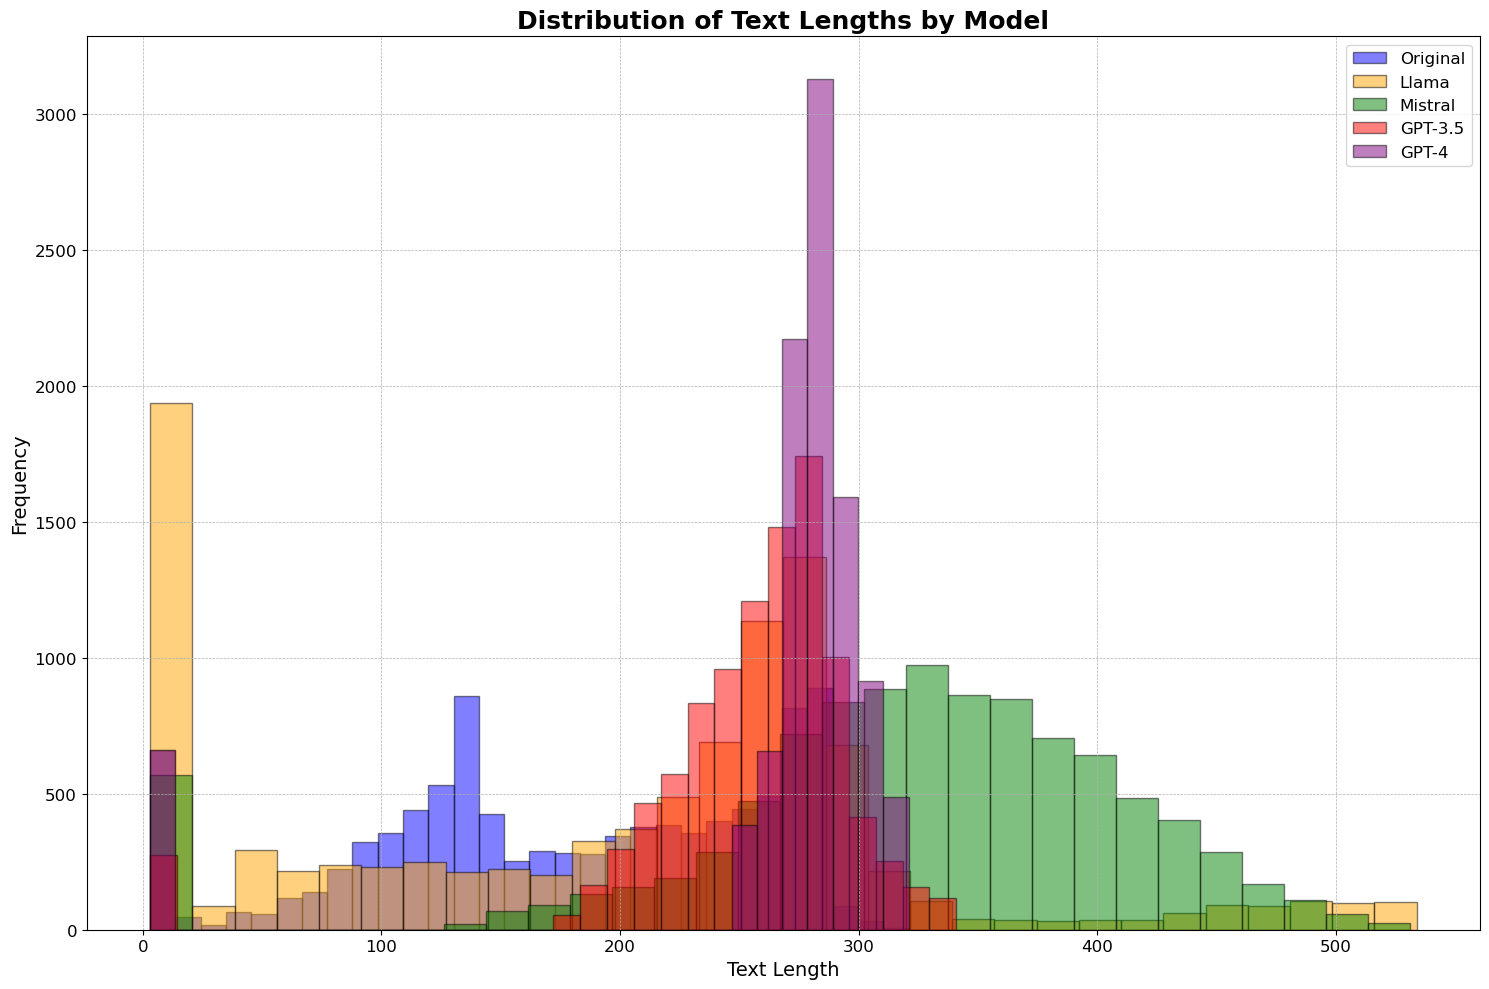

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_cleaned is already created and has been processed

# Set the figure size
plt.figure(figsize=(15, 10))

# Get a list of unique models
models = df_cleaned['model'].unique()

# Define a color palette (using distinguishable colors)
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot a histogram for each model using the cleaned data
for model, color in zip(models, colors):
    lengths = df_cleaned[df_cleaned['model'] == model]['length']
    plt.hist(lengths, bins=30, alpha=0.5, label=model, color=color, edgecolor='black')  # Adjust alpha for transparency and add edgecolor for clarity

# Adding title and labels
plt.title('Distribution of Text Lengths by Model', fontsize=18, fontweight='bold')
plt.xlabel('Text Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a legend outside the plot area
plt.legend(loc='upper right', fontsize=12, frameon=True)

# Set font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


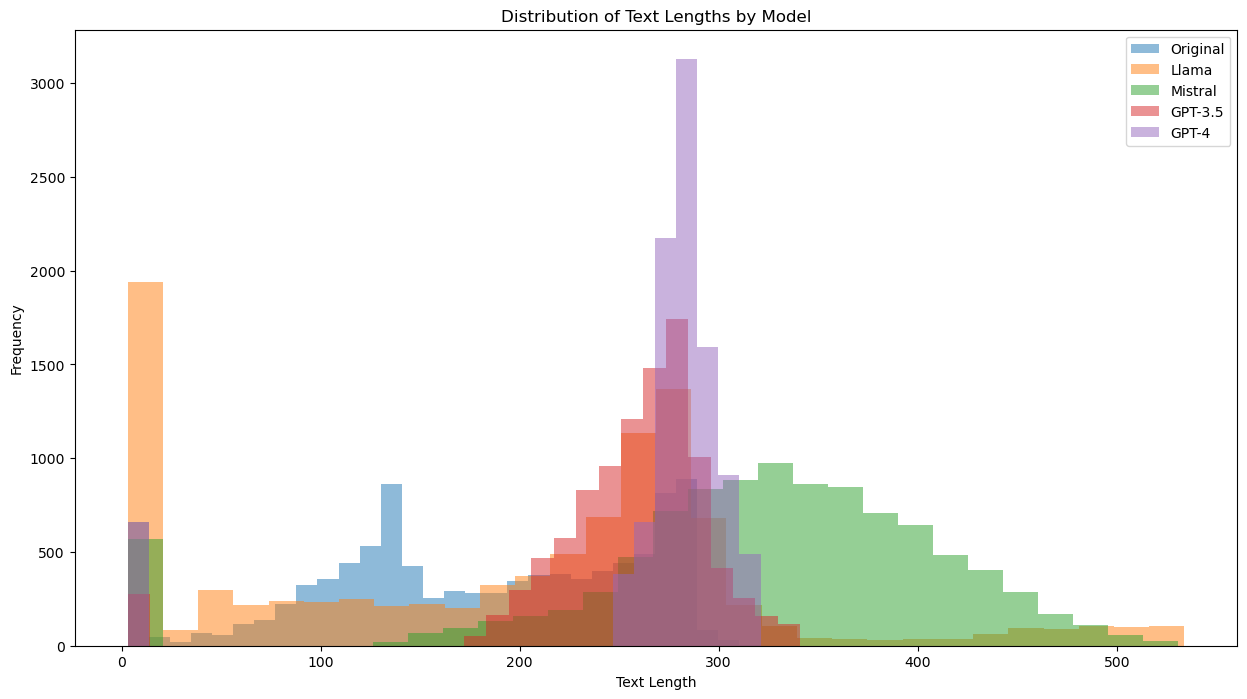

In [15]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Get a list of unique models
models = df_cleaned['model'].unique()

# Plot a histogram for each model using the cleaned data
for model in models:
    lengths = df_cleaned[df_cleaned['model'] == model]['length']
    plt.hist(lengths, bins=30, alpha=0.5, label=model)  # Adjust alpha for transparency

# Adding title and labels
plt.title('Distribution of Text Lengths by Model')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Plotting the median line using cleaned data
median_length = df_cleaned['length'].median()

# Adding a legend
plt.legend()

# Display the plot
plt.show()


<Figure size 2500x1200 with 0 Axes>

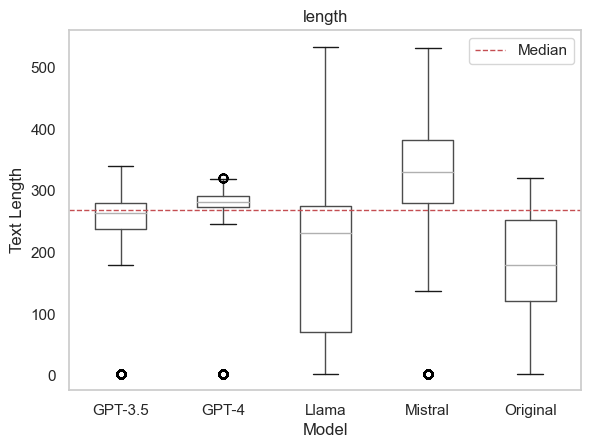

In [20]:
# Visualizing the distribution of text lengths with median
plt.figure(figsize=(25, 12))
boxplot = df_lengths_melted.boxplot(by='model', column=['length'], grid=False)
#plt.title('Distribution of Text Lengths by Model')
plt.suptitle('')
plt.xlabel('Model')
plt.ylabel('Text Length')
plt.axhline(df_lengths_melted['length'].median(), color='r', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show();

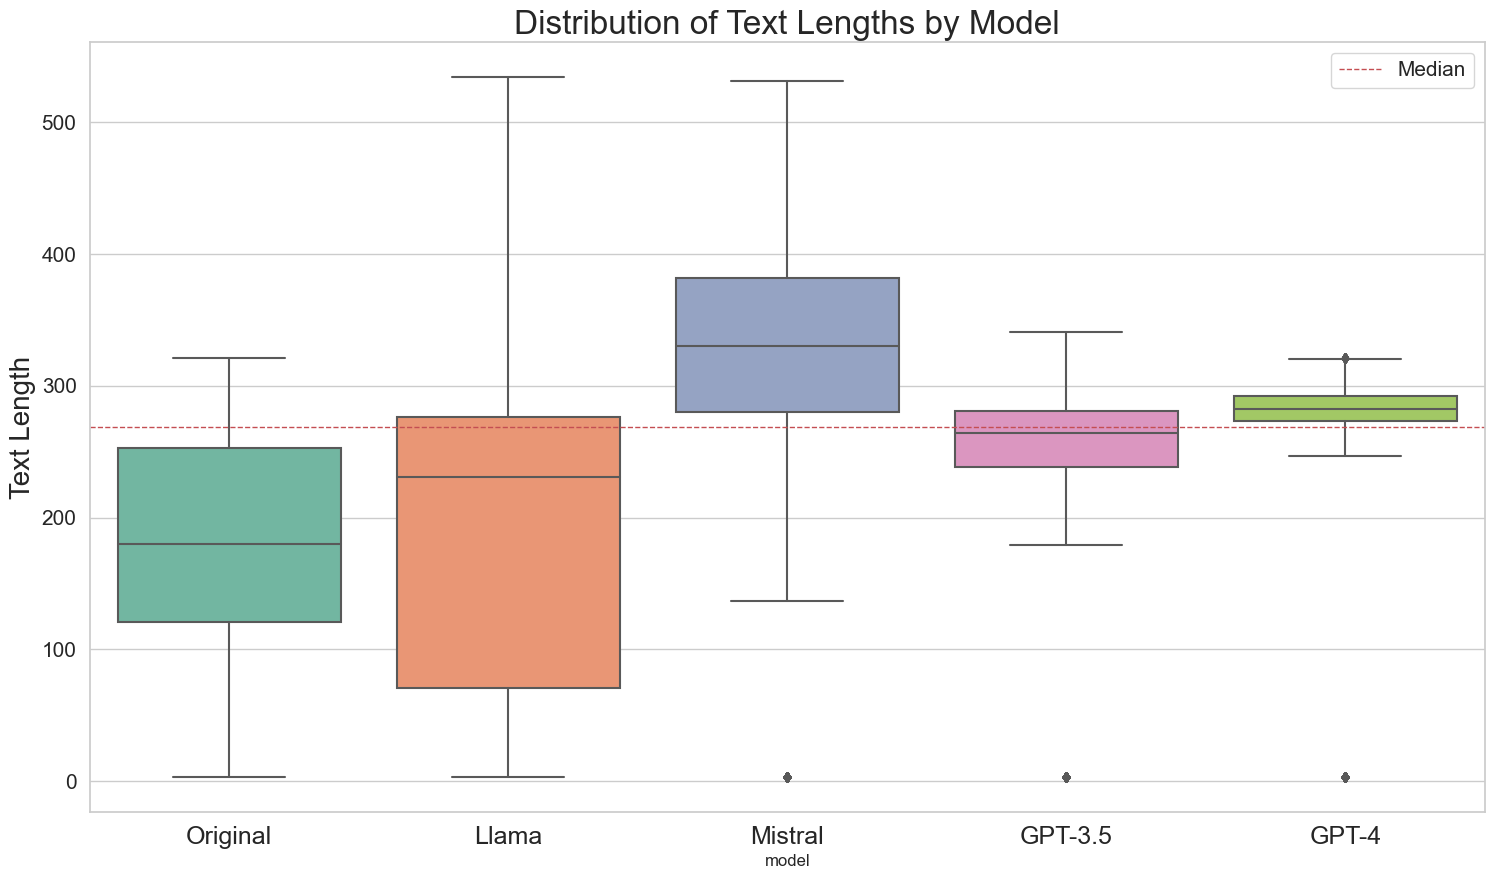

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_lengths_melted is already defined
plt.figure(figsize=(18, 10))

# Use seaborn for improved aesthetics
sns.set(style="whitegrid")

# Create a boxplot
boxplot = sns.boxplot(x='model', y='length', data=df_lengths_melted, palette='Set2')

# Customize title and labels
plt.title('Distribution of Text Lengths by Model', fontsize=24)
plt.ylabel('Text Length', fontsize=20)

# Add a horizontal line for the median
median_value = df_lengths_melted['length'].median()
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=1, label='Median')

# Add a legend for the median line
plt.legend(fontsize=15)

# Customize ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)

# Show the plot
plt.show()


In [14]:
df_cleaned['model'].unique()

array(['Original', 'Llama', 'Mistral', 'GPT-3.5', 'GPT-4'], dtype=object)

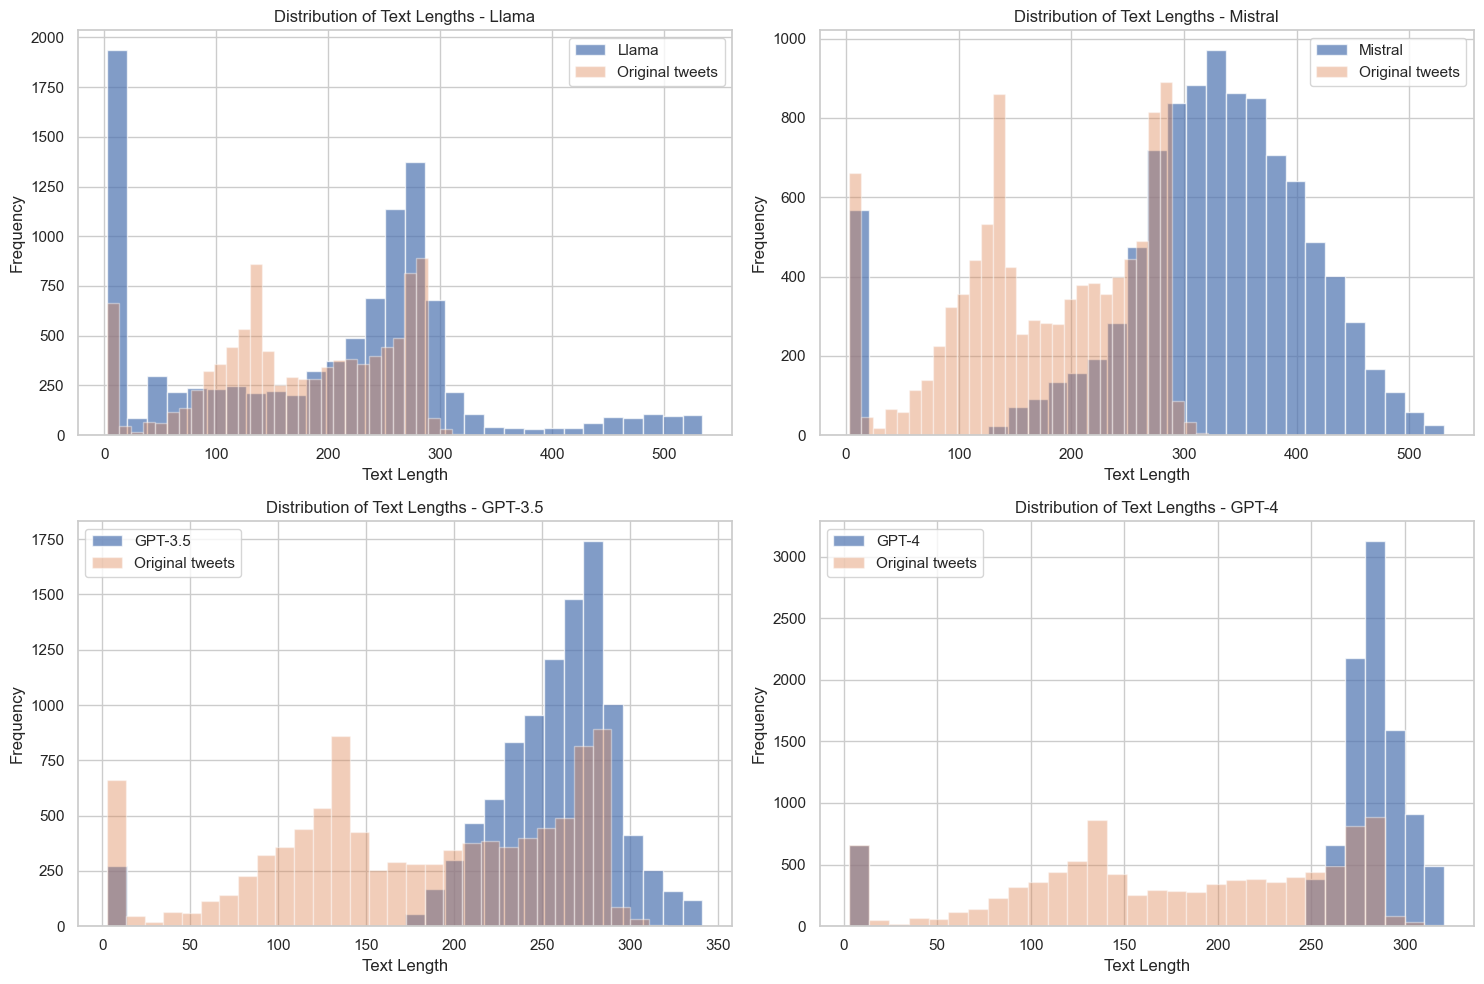

In [21]:
import matplotlib.pyplot as plt

# Set the number of subplots (2 rows, 2 columns for 4 subplots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid

# Get a list of unique models (ensure there are 4 models)
models = ['Llama', 'Mistral', 'GPT-3.5', 'GPT-4']

# Get the lengths for the "Original" data
original_lengths = df_cleaned[df_cleaned['model'] == 'Original']['length']

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot a histogram for each model and overlay "Original" data
for i, model in enumerate(models[:4]):  # Limiting to the first 4 models
    lengths = df_cleaned[df_cleaned['model'] == model]['length']
    
    # Plot the histogram for the model
    axes[i].hist(lengths, bins=30, alpha=0.7, label=f'{model}')  # Adjust alpha for transparency
    
    # Overlay the "Original" histogram on each subplot
    axes[i].hist(original_lengths, bins=30, alpha=0.4, label='Original tweets')  # Lower alpha for Original
    
    # Set the title and labels
    axes[i].set_title(f'Distribution of Text Lengths - {model}')
    axes[i].set_xlabel('Text Length')
    axes[i].set_ylabel('Frequency')
    
    # Add the legend for each subplot
    axes[i].legend()


# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()
